In [29]:
import numpy

In [30]:
# pauli matrices
def sig(n):
    # pauli matrices
    # n = 0 is identity, n = 1,2,3 is x,y,z resp.
    if n == 0:
        a = np.identity(2, dtype = complex)
    if n == 1:
        a = np.array([[0 , 1],[1 , 0]], dtype = complex)
    if n == 2:
        a = np.array([[0 , -1j],[1j , 0]], dtype = complex)
    if n == 3:
        a = np.array([[1 , 0],[0 , -1]], dtype = complex)
    return a

In [31]:
def ab_to_alphabeta(thet):
    """
    Matrix that transforms (a,b)^T (alpha,beta)^T
    """
    # dtype = complex?
    M = np.array([[np.cos(thet/2),np.sin(thet/2)],[np.sin(thet/2),-np.cos(thet/2)]])
    return M

In [32]:
def theta(w0,w1,w):
    """
    Calculates theta
    """
    weff = np.sqrt((w0-w)**2 + w1**2)
    thet = np.arccos((w0-w)/weff)
    return thet

In [48]:
def params_to_omegas(B0,B,g,q,m,c):
    """
    Calculates omegas from parameters
    """
    w0 = -g*q*B0/(2*m*c)
    w1 = -g*q*B/(2*m*c)
    return [w0,w1]

In [49]:
def psi(t,psi0,w0,w1,w):
    """
    psi(t)
    """
    # theta
    thet = theta(w0,w1,w)
    weff = np.sqrt((w0-w)**2 + w1**2)
    # alpha and beta
    alpha_beta = np.dot(ab_to_alphabeta(thet),psi0)
    alpha = alpha_beta[0]
    beta = alpha_beta[1]
    # cos(theta/2) and sin(theta/2)
    costo2 = np.cos(thet/2)
    sinto2 = np.sin(thet/2)
    # top
    top = costo2*np.exp(-1j*w/2*t)*np.exp(-1j*weff/2*t)*alpha
    top += sinto2*np.exp(-1j*w/2*t)*np.exp(1j*weff/2*t)*beta
    # bottom
    bot = sinto2*np.exp(1j*w/2*t)*np.exp(-1j*weff/2*t)*alpha
    bot += -costo2*np.exp(1j*w/2*t)*np.exp(1j*weff/2*t)*beta
    # psi(t)
    psi_t = np.array([[top],[bot]],dtype=complex)
    
    return psi_t

In [53]:
def probability_plus_z(psi_t):
    """
    Returns |<+z|psi(t)>|^2
    """
    prob_amp = psi_t[0]
    prob = np.abs(prob_amp)**2
    return prob

In [54]:
def main(t,psi0,B0,B,w,g,q,m,c):
    """
    Main
    Returns prob to be in key for given t
    """
    # omegas
    [w0,w1] = params_to_omegas(B0,B,g,q,m,c)
    
    # psi(t)
    psi_t = psi(t,psi0,w0,w1,w)
    
    # prob
    prob = probability_plus_z(psi_t)
    
    return prob

In [56]:
import matplotlib.pyplot as plt

In [67]:
def plot(psi0,B0,B,w,g,q,m,c):
    t = np.linspace(0,2*np.pi,num=100)
    prob_t = main(t,psi0,B0,B,w,g,q,m,c)
    
    fig = plt.figure(figsize=(10,5))
    plt.suptitle("$|<+z|\psi(t)>|^2$")
    plt.xlabel("$t$")
    plt.ylabel("$|<+z|\psi(t)>|^2$")
    plt.plot(t,prob_t[0])
    plt.ylim(0,1.1)
    plt.show()
    

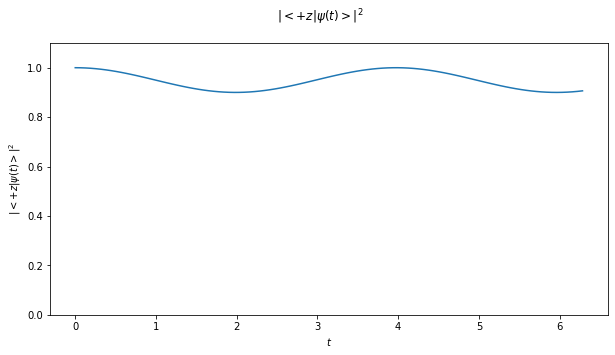

In [68]:
plot([[1.],[0.]],1,1,1,1,1,1,1)